In [41]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score



In [21]:
df = pd.read_csv("WELFake_Dataset.csv")
df.head(20)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [22]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

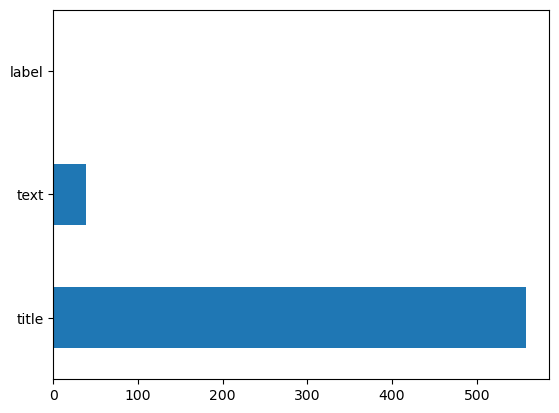

In [23]:
df.isnull().sum().plot(kind="barh")
plt.show()

In [24]:
df.dropna(subset=['title', 'text', 'label'], inplace=True)

In [25]:
X = df['title'] + ' ' + df['text']
y = df['label']


In [26]:
df["title_text"] = df["title"] + df["text"]
df["body_len"] = df["title_text"].apply(lambda x: len(x) - x.count(" "))
df.head()


,title,text,label,title_text,body_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...,1342


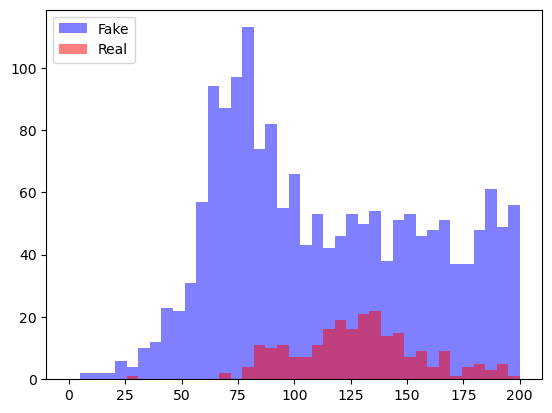

In [27]:
bins = np.linspace(0, 200, 40)

plt.hist(df[df["label"]== 1]["body_len"], bins, alpha=0.5, label="Fake", color="blue")
plt.hist(df[df["label"]== 0]["body_len"], bins, alpha=0.5, label="Real", color="red")
plt.legend(loc="upper left")
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [29]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [30]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)
y_pred_nb = naive_bayes.predict(X_test_vectorized)
classification_rep_nb = classification_report(y_test, y_pred_nb)
print("Naive Bayes Classification Report:\n", classification_rep_nb)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     17542
           1       0.90      0.88      0.89     18227

    accuracy                           0.89     35769
   macro avg       0.89      0.89      0.89     35769
weighted avg       0.89      0.89      0.89     35769



In [31]:
mdecision_tree = DecisionTreeClassifier()
mdecision_tree.fit(X_train_vectorized, y_train)
y_pred_dt = mdecision_tree.predict(X_test_vectorized)
classification_rep_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", classification_rep_dt)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     17542
           1       0.93      0.94      0.94     18227

    accuracy                           0.93     35769
   macro avg       0.93      0.93      0.93     35769
weighted avg       0.93      0.93      0.93     35769



In [32]:
logistic_regression = LogisticRegression(max_iter=5000)
logistic_regression.fit(X_train_vectorized, y_train)
y_pred_lr = logistic_regression.predict(X_test_vectorized)
classification_rep_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:\n", classification_rep_lr)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     17542
           1       0.95      0.96      0.96     18227

    accuracy                           0.96     35769
   macro avg       0.96      0.96      0.96     35769
weighted avg       0.96      0.96      0.96     35769



In [72]:
precision_nb = precision_score(y_test, y_pred_nb)
precision_dt = precision_score(y_test, y_pred_dt)
precision_lr = precision_score(y_test, y_pred_lr)

In [73]:
recall_nb = recall_score(y_test, y_pred_nb)
recall_dt = recall_score(y_test, y_pred_dt)
recall_lr = recall_score(y_test, y_pred_lr)

In [74]:
f1_nb = f1_score(y_test, y_pred_nb)
f1_dt = f1_score(y_test, y_pred_dt)
f1_lr = f1_score(y_test, y_pred_lr)


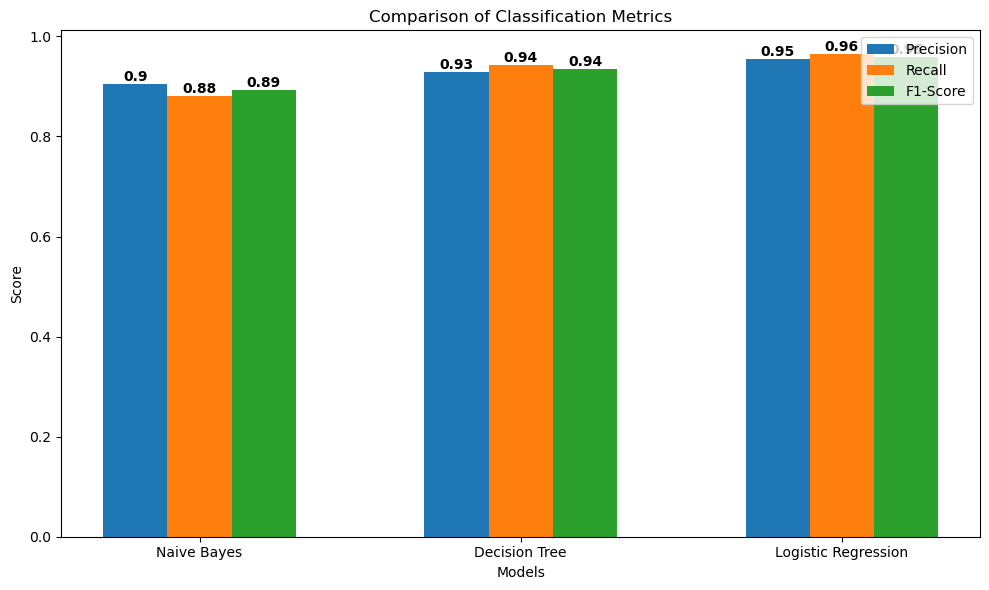

In [78]:
models = ['Naive Bayes', 'Decision Tree', 'Logistic Regression']
precision_scores = [precision_nb, precision_dt, precision_lr]
recall_scores = [recall_nb, recall_dt, recall_lr]
f1_scores = [f1_nb, f1_dt, f1_lr]

plt.figure(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(models))

plt.bar(index, precision_scores, width=bar_width, label='Precision')
plt.bar(index + bar_width, recall_scores, width=bar_width, label='Recall')
plt.bar(index + 2 * bar_width, f1_scores, width=bar_width, label='F1-Score')

plt.title('Comparison of Classification Metrics')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(index + bar_width, models)
plt.legend()

for i in range(len(models)):
    plt.text(index[i], precision_scores[i], round(precision_scores[i], 2),
             ha='center', va='bottom', fontweight='bold')

# Add recall scores as text on top of the bars
for i in range(len(models)):
    plt.text(index[i] + bar_width, recall_scores[i], round(recall_scores[i], 2),
             ha='center', va='bottom', fontweight='bold')

# Add F1-scores as text on top of the bars
for i in range(len(models)):
    plt.text(index[i] + 2 * bar_width, f1_scores[i], round(f1_scores[i], 2),
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()